## Numpy

In [1]:
import numpy as np

### Zadanie 1.

Stwórz losową tablicę 10,000 liczb, następnie do każdego elementu dodaj 1. Następnie napisz dokładnie tę samą funkcję używając `numpy` i jego tablic. Porównaj czas działania swoich rozwiązań.

In [2]:
import random

In [3]:
%%timeit -n 40
arr1 = [random.random() for _ in range(10000)]
arr1 = [i + 1 for i in arr1]

1.83 ms ± 356 µs per loop (mean ± std. dev. of 7 runs, 40 loops each)


In [4]:
%%timeit -n 40
arr2 = np.random.rand(10000)
arr2 = arr2 + 1

132 µs ± 41.9 µs per loop (mean ± std. dev. of 7 runs, 40 loops each)


### Zadanie 2.

Napisz funkcje obliczajaca $\sin(x) + \cos(x)$ dla kazdego elementu tablicy 10,000 losowych liczb używając pętli oraz używając numpy, porownaj ich szybkość podobnie jak w poprzednim zadaniu.

In [5]:
from math import sin, cos

In [6]:
arr1 = [random.random() for _ in range(10000)]
def func1(arr):
    return [sin(i) + cos(i) for i in arr]

In [7]:
arr2 = np.random.rand(10000)
def func2(arr):
    return np.sin(arr) + np.cos(arr)

In [8]:
%%timeit -n 40
func1(arr1)

1.51 ms ± 185 µs per loop (mean ± std. dev. of 7 runs, 40 loops each)


In [9]:
%%timeit -n 40
func2(arr2)

227 µs ± 34.9 µs per loop (mean ± std. dev. of 7 runs, 40 loops each)


### Zadanie 3.

Napisz wydajniejszą forme następujących funkcji. Dopisz do każdej test potwierdzający szybkość zaproponowanego rozwiązania.

In [10]:
def cube_sum(x):
    """Zwraca sume szescianow elementow"""
    result = 0
    for i in range(len(x)):
        result += x[i] ** 3
    return result

def almost_variance(x):
    """Oblicza 1/n * SUM (x_i - mean(x))^4"""
    m = sum(x) / len(x)
    result = 0
    for i in range(len(x)):
        result += (x[i] - m) ** 4
    result /= len(x)
    return result

In [11]:
def cube_sum_np(x):
    """Zwraca sume szescianow elementow"""
    return np.sum(x**3)

def almost_variance_np(x):
    """Oblicza 1/n * SUM (x_i - mean(x))^4"""
    mean = np.mean(x)
    return np.mean((x - mean)**4)
    

In [12]:
%%timeit -n 40
cube_sum(arr1)

1.35 ms ± 165 µs per loop (mean ± std. dev. of 7 runs, 40 loops each)


In [13]:
%%timeit -n 40
cube_sum_np(arr2)

290 µs ± 83 µs per loop (mean ± std. dev. of 7 runs, 40 loops each)


In [14]:
%%timeit -n 40
almost_variance(arr1)

1.75 ms ± 205 µs per loop (mean ± std. dev. of 7 runs, 40 loops each)


In [15]:
%%timeit -n 40
almost_variance_np(arr2)

321 µs ± 38.5 µs per loop (mean ± std. dev. of 7 runs, 40 loops each)


### Zadanie 4.

Wykorzystujac `broadcasting` (patrz na rysunek poniżej) stwórz tabliczkę mnożenia tzn. tablice $A$ taka, ze $$A_{ij} = i \cdot j\;\;\;\;\; \forall i,j \in \{1,\dots,10\}$$

Czy potrafisz wykonać to jednym poleceniem, nie używajac przy tym petli/comprehensions?

<img src="http://www.astroml.org/_images/fig_broadcast_visual_1.png">

In [16]:
print(np.arange(1, 11).reshape(10, 1) * np.arange(1, 11))

[[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]


### Zad 5.

Wygeneruj losową tablice `10 x 5`, która będzie reprezentować `10` punktów w `5` wymiarowej przestrzeni. Napisz funkcje, która policzy odleglość euklidesową pomiędzy każdą parą punktów, czy potrafisz zrobić to **bez użycia żadnych pętli/comprehensions**? 

Przypomnienie, dla dwóch wektorów: $x$ i $y$ $$d_{e}(x,y) = \| x - y \|^2_2 = \sum_{i=1}^d (x_i - y_i)^2 $$

In [17]:
def calc_euclidean_distance(A):
    n = A.shape[0]
    
    m_dot = np.dot(A, A.T)
    m_diag_tile = np.tile(np.diag(m_dot), (n, 1))
    return m_diag_tile + m_diag_tile.T - 2 * m_dot

A1 = np.random.randn(10, 5)
A2 = np.array([[1,1,1], [2,2,2], [3,3,3]])
A3 = np.array([[1,1,1], [1,1,1], [1,1,1]])
A4 = np.array([[1,1], [5,5]])

print(np.round(calc_euclidean_distance(A1), decimals=3), "\n")
print(np.round(calc_euclidean_distance(A2), decimals=3), "\n")
print(np.round(calc_euclidean_distance(A3), decimals=3), "\n")
print(np.round(calc_euclidean_distance(A4), decimals=3), "\n")

[[ 0.     6.716  4.593  1.755  7.328  5.546  5.32   5.477  3.743  5.327]
 [ 6.716  0.     3.537  5.421  9.049  3.208  2.085  1.127  7.521 11.538]
 [ 4.593  3.537  0.     6.081  9.535  4.353  2.398  4.734 10.067  7.653]
 [ 1.755  5.421  6.081  0.     4.696  4.782  4.575  4.232  3.416  3.537]
 [ 7.328  9.049  9.535  4.696  0.     5.701  4.231 10.825  4.68   5.874]
 [ 5.546  3.208  4.353  4.782  5.701  0.     0.871  2.682  8.731  5.645]
 [ 5.32   2.085  2.398  4.575  4.231  0.871  0.     3.285  7.165  6.248]
 [ 5.477  1.127  4.734  4.232 10.825  2.682  3.285  0.     8.591  9.489]
 [ 3.743  7.521 10.067  3.416  4.68   8.731  7.165  8.591  0.    11.312]
 [ 5.327 11.538  7.653  3.537  5.874  5.645  6.248  9.489 11.312  0.   ]] 

[[ 0  3 12]
 [ 3  0  3]
 [12  3  0]] 

[[0 0 0]
 [0 0 0]
 [0 0 0]] 

[[ 0 32]
 [32  0]] 



In [18]:
def calc_euclidean_distance(A):
    n = A.shape[0]
    res = np.zeros((n, n))
    
    for i in range(n):
        for j in range(i + 1, n):
            res[i, j] = np.linalg.norm(A[i, :] - A[j, :])**2
            res[j, i] = res[i, j]
    return res

A1 = np.random.randn(10, 5)
A2 = np.array([[1,1,1], [2,2,2], [3,3,3]])
A3 = np.array([[1,1,1], [1,1,1], [1,1,1]])
A4 = np.array([[1,1], [5,5]])

print(np.round(calc_euclidean_distance(A1), decimals=3), "\n")
print(np.round(calc_euclidean_distance(A2), decimals=3), "\n")
print(np.round(calc_euclidean_distance(A3), decimals=3), "\n")
print(np.round(calc_euclidean_distance(A4), decimals=3), "\n")

[[ 0.     9.383  5.4   16.504  6.032  2.468 13.081 14.172 21.532 18.51 ]
 [ 9.383  0.     7.842 11.951 16.477 12.761 17.293  7.311 21.509 12.904]
 [ 5.4    7.842  0.     8.263  8.821  7.23   9.949 12.271 19.718 14.168]
 [16.504 11.951  8.263  0.    10.414 16.534 12.454 10.166 17.911  6.458]
 [ 6.032 16.477  8.821 10.414  0.     4.268 12.68  11.872  9.184  8.526]
 [ 2.468 12.761  7.23  16.534  4.268  0.     7.071  9.379 16.753 13.675]
 [13.081 17.293  9.949 12.454 12.68   7.071  0.     8.039 26.767 13.833]
 [14.172  7.311 12.271 10.166 11.872  9.379  8.039  0.    12.738  3.651]
 [21.532 21.509 19.718 17.911  9.184 16.753 26.767 12.738  0.     5.45 ]
 [18.51  12.904 14.168  6.458  8.526 13.675 13.833  3.651  5.45   0.   ]] 

[[ 0.  3. 12.]
 [ 3.  0.  3.]
 [12.  3.  0.]] 

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]] 

[[ 0. 32.]
 [32.  0.]] 



### Zad 6.

Napisz funkcje do "wybielania" zbioru punktow, tj. aplikowania następującej transformacji (ponownie, zrób to bez użycia pętli etc.)
$$
\mathrm{white}(X)_{ij} = \frac{X_{ij} - \mu_j}{\sigma_j}
$$
gdzie $\mu_j$ to srednia po $j$ej kolumnie, a $\sigma_j$ to odchylenie standardowe po tej kolumnie, np.

$$
\mathrm{white}\left ( \left [ \begin{matrix} 
0& 1\\
2& 3\\
4& 5\\
6& 7\\
8& 9
\end{matrix} \right ] \right ) = 
\left [ \begin{matrix} 
-1.41421356& -1.41421356\\
-0.70710678& -0.70710678\\
0.        &  0.        \\
0.70710678&  0.70710678\\
1.41421356&  1.41421356
\end{matrix} \right ]
$$

W szczególności średnia po poszczególnych kolumnach nowej macierzy powinna wynosić `0` a odchylenie standardowe `1`.

In [19]:
def white(X):
    return (X - np.mean(X, axis=0)) / np.std(X, axis=0)

X = np.arange(10).reshape(5,2)
print(white(X))

[[-1.41421356 -1.41421356]
 [-0.70710678 -0.70710678]
 [ 0.          0.        ]
 [ 0.70710678  0.70710678]
 [ 1.41421356  1.41421356]]


### Zad 7.

Majac dana tablice dowolnie wymiarowa (dla uproszczenia mozesz przyjac ze jedno lub dwu) oraz liczbe `x` znajdz najblizsza wartosc `x` w `A`, tzn. 

$$
\mathrm{closest}(x, A) = \arg\min_{a\in A}| x - a| 
$$

np. 

$$
\mathrm{closest}(1.5, [1, -4, 3]) = 1
$$

Ponownie, czy potrafisz zrobic to bez petli, etc.?


In [20]:
def find_closest(x, A):
    idx = np.abs(A - x).argmin()
    return A.flat[idx]

A = np.random.uniform(low=0, high=100, size=(5,4))
print(A)
x = 10
find_closest(x, A)

[[44.55450731  0.76227553 56.72203006 76.49798794]
 [41.80639407  0.70607832 17.526796   35.82128308]
 [31.76460543 74.95277813 84.27674228 51.91326037]
 [ 4.59320354 49.65094769  2.79765259 12.61618982]
 [64.33166842  0.78089955 78.5208504  64.96286662]]


12.6161898182242

### Zad 8.

Zaimplementuj proste liczenie wartosci wielomianu o zadanych wspolczynnikach (analogie `np.poly1d`), czyli funkcje

$$
\mathrm{poly}(x, a) = a_0 + a_1 x + a_2 x^2 + \dots + a_k x^k = \sum_{i=1}^k a_i x^i
$$

Czy potrafisz zrobic to jednolinijkowo bez uzycia petli, etc. (oraz oczywiście `np.poly1d`). 
Może Ci się przydać metoda `cumprod`.

In [21]:
def poly(x, a):
    return np.sum(a[::-1] * x**np.arange(len(a)))

a = np.array([4,3,1,2])
poly_np = np.poly1d(a)

print(poly_np(3))
print(poly(3, a))

140
140


## Obrazki

Do wyświetlania obrazków w notebooku potrzebny będzie `matplotlib`. W PyCharmie można użyć `imshow` z biblioteki `scipy`.

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

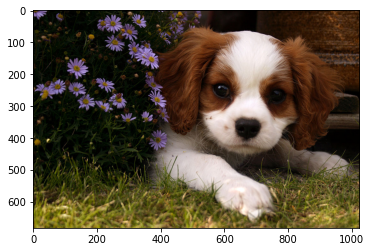

In [23]:
img = mpimg.imread("dog2.jpg")
plt.imshow(img);

### Zad 9.

Napisz funckje do przetwarzania obrazu do skali szarości wg wzoru:

$$ 0.2126 \times R + 0.7152 \times  G + 0.0722 \times B $$

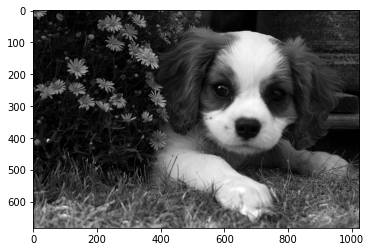

In [24]:
def convert_to_grayscale(img):
    return img[:,:,0] * 0.2126 + img[:,:,1] * 0.7152 + img[:,:,2] * 0.0722

plt.imshow(convert_to_grayscale(img), cmap="gray")

### Zadanie 10.

Wyłącznie za pomocą metod numpy napisz kod do interpolacji liniowej pomiędzy parą punktów (dowolnej wymiarowości) wg wzoru:

$$ x_i = \lambda x_1 + (1 - \lambda) x_2$$

Kod powinien od razu generować interpolacje dla wielu wartości $\lambda$, np dla 10 różnych $\lambda \in \{0, 0.1, 0.2, \dots, 1\}$

In [37]:
x1 = np.random.randn(5)
x2 = np.random.randn(5) + np.random.randint(2)

def interpolation(x1, x2, lambdas):
    lambdas_col = lambdas.reshape(-1, 1) 
    return lambdas_col * x1 + (1 - lambdas_col) * x2

lambdas = np.linspace(0, 1, 11)
X = interpolation()

print(X)

[[ 9.30870810e-02 -6.94826683e-01 -5.21475300e-01  9.92765559e-01
  -3.08664453e-01]
 [ 6.21716897e-02 -7.68802908e-01 -4.86464782e-01  8.56900297e-01
  -3.81934228e-01]
 [ 3.12562984e-02 -8.42779133e-01 -4.51454264e-01  7.21035035e-01
  -4.55204003e-01]
 [ 3.40907064e-04 -9.16755359e-01 -4.16443745e-01  5.85169773e-01
  -5.28473778e-01]
 [-3.05744843e-02 -9.90731584e-01 -3.81433227e-01  4.49304511e-01
  -6.01743553e-01]
 [-6.14898756e-02 -1.06470781e+00 -3.46422709e-01  3.13439249e-01
  -6.75013328e-01]
 [-9.24052669e-02 -1.13868403e+00 -3.11412190e-01  1.77573987e-01
  -7.48283103e-01]
 [-1.23320658e-01 -1.21266026e+00 -2.76401672e-01  4.17087249e-02
  -8.21552878e-01]
 [-1.54236050e-01 -1.28663649e+00 -2.41391153e-01 -9.41565371e-02
  -8.94822653e-01]
 [-1.85151441e-01 -1.36061271e+00 -2.06380635e-01 -2.30021799e-01
  -9.68092428e-01]
 [-2.16066832e-01 -1.43458894e+00 -1.71370117e-01 -3.65887061e-01
  -1.04136220e+00]]
